### <center>Exercise 3</center>

**<a href='#Q1'>Q1</a>** ||| **<a href='#Q2'>Q2</a>** ||| **<a href='#Q3'>Q3</a>** ||| **<a href='#Q4'>Q4</a>**

In [1]:
import warnings
import numpy as np
import pandas as pd
import plotly.offline as py
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from re import match,search
from bubbly.bubbly import bubbleplot


warnings.filterwarnings("ignore")
py.init_notebook_mode(connected=True)

## <a id="Q1">Q1</a>  

Analyze the movie data set.  What is the range of movie gross in theUnited States? 

Which type of movies are most likely to succeed in the market? Comedy? PG-13? Drama?

In [2]:
PATH = "movies.csv"
data = pd.read_csv(PATH)
data

Title  US Gross Worldwide Gross  US DVD Sales  \
0                 The Land Girls    146083          146083           NaN   
1         First Love, Last Rites     10876           10876           NaN   
2     I Married a Strange Person    203134          203134           NaN   
3           Let's Talk About Sex    373615          373615           NaN   
4                           Slam   1009819         1087521           NaN   
...                          ...       ...             ...           ...   
3196  Zack and Miri Make a Porno  31452765        36851125    21240321.0   
3197                      Zodiac  33080084        83080084    20983030.0   
3198                        Zoom  11989328        12506188     6679409.0   
3199         The Legend of Zorro  45575336       141475336           NaN   
3200           The Mask of Zorro  93828745       233700000           NaN   

      Production Budget Release Date MPAA Rating  Running Time (min)  \
0             8000000.0    12-Jun-98           R                 NaN   
1              300000.0     7-Aug-98           R                 NaN   
2              250000.0    28-Aug-98         NaN                 NaN   
3              300000.0    11-Sep-98         NaN                 NaN   
4             1000000.0     9-Oct-98           R                 NaN   
...                 ...          ...         ...                 ...   
3196         24000000.0    31-Oct-08           R               101.0   
3197         85000000.0     2-Mar-07           R               157.0   
3198         35000000.0    11-Aug-06          PG                 NaN   
3199         80000000.0    28-Oct-05          PG               129.0   
3200         65000000.0    17-Jul-98       PG-13               136.0   

             Distributor                        Source        Major Genre  \
0               Gramercy                           NaN                NaN   
1                 Strand                           NaN              Drama   
2              Lionsgate                           NaN             Comedy   
3              Fine Line                           NaN             Comedy   
4                Trimark           Original Screenplay              Drama   
...                  ...                           ...                ...   
3196       Weinstein Co.           Original Screenplay             Comedy   
3197  Paramount Pictures     Based on Book/Short Story  Thriller/Suspense   
3198       Sony Pictures  Based on Comic/Graphic Novel          Adventure   
3199       Sony Pictures                        Remake          Adventure   
3200       Sony Pictures                        Remake          Adventure   

             Creative Type         Director  Rotten Tomatoes Rating  \
0                      NaN              NaN                     NaN   
1                      NaN              NaN                     NaN   
2                      NaN              NaN                     NaN   
3                      NaN              NaN                    13.0   
4     Contemporary Fiction              NaN                    62.0   
...                    ...              ...                     ...   
3196  Contemporary Fiction      Kevin Smith                    65.0   
3197         Dramatization    David Fincher                    89.0   
3198            Super Hero     Peter Hewitt                     3.0   
3199    Historical Fiction  Martin Campbell                    26.0   
3200    Historical Fiction  Martin Campbell                    82.0   

      IMDB Rating  IMDB Votes  
0             6.1      1071.0  
1             6.9       207.0  
2             6.8       865.0  
3             NaN         NaN  
4             3.4       165.0  
...           ...         ...  
3196          7.0     55687.0  
3197          NaN         NaN  
3198          3.4      7424.0  
3199          5.7     21161.0  
3200          6.7      4789.0  

[3201 rows x 16 columns]

In [3]:
rating =  data["MPAA Rating"].dropna()
rating

0           R
1           R
4           R
6           R
7           R
        ...  
3196        R
3197        R
3198       PG
3199       PG
3200    PG-13
Name: MPAA Rating, Length: 2596, dtype: object

In [4]:
us_gross = data["US Gross"].sort_values()
us_gross

1555          0
672           0
1775          0
3085          0
942           0
         ...   
467     Unknown
118     Unknown
266     Unknown
1025    Unknown
404     Unknown
Name: US Gross, Length: 3201, dtype: object

In [5]:
us_gross.replace("Unknown",np.nan,inplace=True)
us_gross.replace("0",np.nan,inplace=True)
us_gross.dropna(inplace=True)

In [6]:
us_gross = us_gross.to_list()
us_gross_sorted = list(map(int, us_gross))
us_gross_sorted = sorted(us_gross_sorted)
#print(us_gross_sorted)

In [7]:
R = rating[rating == "R"]
print(R)
PG = rating[rating == "PG"]
#print(PG)
PG_13 = rating[rating == "PG-13"]
#print(PG_13)
G = rating[rating == "G"]
#print(G)
box_R = go.Box(x=R, y = us_gross_sorted,name="R", fillcolor="#636EFA")
box_PG = go.Box(x=PG,y = us_gross_sorted, name="PG", fillcolor="#EF553B")
box_PG_13 = go.Box(x=PG_13,y = us_gross_sorted, name="PG_13", fillcolor="#00CC96")
box_G = go.Box(x=G ,y = us_gross_sorted, name="G ", fillcolor="#AB63FA")

0       R
1       R
4       R
6       R
7       R
       ..
3190    R
3193    R
3195    R
3196    R
3197    R
Name: MPAA Rating, Length: 1194, dtype: object


In [8]:
layout = go.Layout(title="MPAA Rating")
fig = go.Figure(data=[box_R, box_PG,box_PG_13,box_G], layout=layout)
py.iplot(fig)

In [9]:
movie_g = data["Major Genre"].dropna()
movie_g.unique()

array(['Drama', 'Comedy', 'Musical', 'Thriller/Suspense', 'Adventure',
       'Action', 'Romantic Comedy', 'Horror', 'Western', 'Documentary',
       'Black Comedy', 'Concert/Performance'], dtype=object)

In [10]:
drama = movie_g[movie_g == movie_g.unique()[0]]
comedy = movie_g[movie_g == movie_g.unique()[1]]
musical = movie_g[movie_g == movie_g.unique()[2]]
thriller = movie_g[movie_g == movie_g.unique()[3]]
adventure = movie_g[movie_g == movie_g.unique()[4]]
action = movie_g[movie_g == movie_g.unique()[5]]
romantic_comedy = movie_g[movie_g == movie_g.unique()[6]]
horror = movie_g[movie_g == movie_g.unique()[7]]
western = movie_g[movie_g == movie_g.unique()[8]]
documentary = movie_g[movie_g == movie_g.unique()[9]]
black_comedy = movie_g[movie_g == movie_g.unique()[10]]
concert = movie_g[movie_g == movie_g.unique()[11]]

In [11]:
box_drama = go.Box(x=drama, y = us_gross_sorted,name="drama", fillcolor="#636EFA")
box_comedy = go.Box(x=comedy,y = us_gross_sorted, name="comedy", fillcolor="#EF553B")
box_musical = go.Box(x=musical,y = us_gross_sorted, name="musical", fillcolor="#00CC96")
box_thriller = go.Box(x=thriller ,y = us_gross_sorted, name="thriller", fillcolor="#AB63FA")
box_adventure = go.Box(x=adventure, y = us_gross_sorted,name="adventure", fillcolor="#636EFA")
box_action = go.Box(x=action,y = us_gross_sorted, name="action", fillcolor="#EF553B")
box_romantic_comedy = go.Box(x=musical,y = us_gross_sorted, name="romantic comedy", fillcolor="#00CC96")
box_horror = go.Box(x=horror ,y = us_gross_sorted, name="horror", fillcolor="#AB63FA")
box_western = go.Box(x=western, y = us_gross_sorted,name="western", fillcolor="#636EFA")
box_documentary = go.Box(x=comedy,y = us_gross_sorted, name="documentary", fillcolor="#EF553B")
box_black_comedy = go.Box(x=black_comedy,y = us_gross_sorted, name="black_comedy", fillcolor="#00CC96")
box_concert = go.Box(x=concert ,y = us_gross_sorted, name="concert", fillcolor="#AB63FA")

In [12]:
layout = go.Layout(title="Moive Major Genre")
fig = go.Figure(data=[box_drama, box_comedy,box_musical,box_thriller,box_adventure,box_action,box_romantic_comedy,box_horror,box_western,box_documentary,box_black_comedy,box_concert], layout=layout)
py.iplot(fig)

After we delete(dropna)the zeros and the unknown values we got a range between min <strong>401 US dollar </strong> and max<strong> 760167650 US dollar </strong>

In [13]:
print("the range in us of movie gross")
print(min(us_gross_sorted),"\t to \t", max(us_gross_sorted))

the range in us of movie gross
401 	 to 	 760167650


<strong>------------------------------------------------------------------------------------ </strong>

PG-13 are sort of MPAA Rating and when we see the figuer above we can see that R type is most likely to succeed in the market according to MPAA Rating and second to succeed is PG-13 with average  <strong>4.24 M </strong> in the market

Between Comedy and Drama the drama movie genre will succeed in the market with average <strong>3.34 M </strong> and comady with average <strong>2.24 M </strong>

between PG-13,Comedy and Drama the PG-13 will most succeed in the market with max <strong>7.53 M </strong> and average  <strong>4.24 M </strong> and min  <strong>401 dollar</strong>

## <a id="Q3">Q3</a>  

Analyze the 2012 Olympic data set. What can you say about the relation-ship between a country’s population and the number of medals it wins?

What can you say about the relationship between the ratio of female and male counts and the GDP of that country?

In [14]:
PATH = "olympics.csv"
data = pd.read_csv(PATH)
data

ISO country code Country name      2011 GDP  2010 population  Female count  \
0               USA           US  1.509400e+13        309349000           271   
1               CHN        China  7.298100e+12       1338300000           208   
2               JPN        Japan  5.867150e+12        127451000           162   
3               DEU      Germany  3.570560e+12         81777000           176   
4               FRA       France  2.773030e+12         64895000           148   
5               BRA       Brazil  2.476650e+12        194946000           128   
6               GBR           UK  2.431590e+12         62232000           269   
7               ITA        Italy  2.194750e+12         60483000           122   
8               RUS       Russia  1.857770e+12        141750000           227   
9               IND        India  1.847980e+12       1224615000            23   
10              JAM      Jamaica  1.506977e+10          2702000            25   
11              GEO      Georgia  1.436657e+10          4452000             6   
12              PRK  North Korea  1.228000e+10         24589122            40   
13              ARM      Armenia  1.024779e+10          3092000             4   
14              MNG     Mongolia  8.557530e+09          2756000            13   
15              BHS      Bahamas  7.787514e+09           343000            11   
16              MDA      Moldova  7.000319e+09          3562000            10   
17              TJK   Tajikistan  6.522200e+09          6879000             3   
18              MNE   Montenegro  4.550463e+09           632000            16   
19              GRD      Grenada  8.160541e+08           104000             4   

    Male count  Gold medals  Silver medals  Bronze medals  
0          260           46             29             29  
1          163           38             27             23  
2          141            7             14             17  
3          219           11             19             14  
4          187           11             11             12  
5          138            3              5              9  
6          287           29             17             19  
7          159            8              9             11  
8          208           24             26             32  
9           60            0              2              4  
10          25            4              4              4  
11          29            1              3              3  
12          15            4              0              2  
13          21            0              1              2  
14          16            0              2              3  
15          15            1              0              0  
16          12            0              0              2  
17          13            0              0              1  
18          18            0              1              0  
19           6            1              0              0

In [15]:
data_sorted = data.sort_values(by=['2010 population'],ignore_index=True)
data_sorted["Medals Wins"] = data_sorted['Gold medals'] + data_sorted['Silver medals'] +data_sorted['Bronze medals']

In [16]:
scatterplots = list()
for name in data_sorted["Country name"]:
    df = data_sorted[data_sorted["Country name"] == name]
    trace = go.Scatter(
        x=df["2010 population"],
        y=df["Medals Wins"],
        name=name,
        marker=dict(symbol="circle", sizemode="area", sizeref=10, size=df["2010 population"]/100000), #size of each circle = df["ID"]
    )
    scatterplots.append(trace)

layout = go.Layout(
    title="Population and medals Wins by Country ",
    xaxis=dict(title="Population, M"),
    yaxis=dict(title="Medals Wins"),
    showlegend=True,
)

fig = dict(data=scatterplots, layout=layout)
py.iplot(fig)

According the both analyset figures above we can see that there is no direct relationship between big population and quantity of medal wins for example Russia have less population than India but more medal wins and we can see that Germany that have more population than Brazil and more medal wins. 

As shown in the scatter and linear figures we can say in general that when the population less than 200 M , then more population country have then more medal wins they can have.

In [17]:
scatterplots = list()
for name in data_sorted["Country name"]:
    df = data_sorted[data_sorted["Country name"] == name]
    trace = go.Scatter(
        x=df["2011 GDP"],
        y=df["Male count"],
        name=name,
        marker=dict(symbol="circle", sizemode="area", sizeref=10, size=df["2011 GDP"]/1000000000), #size of each circle = df["ID"]
    )
    scatterplots.append(trace)

layout = go.Layout(
    title="2011 GDP and Male count by Country ",
    xaxis=dict(title="2011 GDP"),
    yaxis=dict(title="Male count"),
    showlegend=True,
)

fig = dict(data=scatterplots, layout=layout)
py.iplot(fig)

In [18]:
scatterplots = list()
for name in data_sorted["Country name"]:
    df = data_sorted[data_sorted["Country name"] == name]
    trace = go.Scatter(
        x=df["2011 GDP"],
        y=df["Female count"],
        name=name,
        marker=dict(symbol="circle", sizemode="area", sizeref=10, size=df["2011 GDP"]/1000000000), #size of each circle = df["ID"]
    )
    scatterplots.append(trace)

layout = go.Layout(
    title="2011 GDP and Female count by Country ",
    xaxis=dict(title="2011 GDP"),
    yaxis=dict(title="Female count"),
    showlegend=True,
)

fig = dict(data=scatterplots, layout=layout)
py.iplot(fig)

In [19]:
women_ratio = [i/j for i,j in zip(data_sorted['Female count'],data_sorted['Male count'])]
_data = {'Country name':data_sorted["Country name"].to_list(),
        'Ratio':women_ratio}
ratio_df = pd.DataFrame(_data)
print(ratio_df)
pie_ratio = go.Pie(
    labels=data_sorted['Country name'],
    values=women_ratio,
    name="GDP ratio for women over men",
    hole=0.4,
    domain={"x": [1, 1]}, #where to put the graph
)

layout = dict(
    title = 'GDP ratio for women over men',
    font=dict(size=15),
    legend=dict(orientation="h"), #horizontally,
)

fig = dict(data=[pie_ratio], layout=layout)
py.iplot(fig)

   Country name     Ratio
0       Grenada  0.666667
1       Bahamas  0.733333
2    Montenegro  0.888889
3       Jamaica  1.000000
4      Mongolia  0.812500
5       Armenia  0.190476
6       Moldova  0.833333
7       Georgia  0.206897
8    Tajikistan  0.230769
9   North Korea  2.666667
10        Italy  0.767296
11           UK  0.937282
12       France  0.791444
13      Germany  0.803653
14        Japan  1.148936
15       Russia  1.091346
16       Brazil  0.927536
17           US  1.042308
18        India  0.383333
19        China  1.276074


**Male count :** the male count scatter figure shows there is no pattern that prove if there any direct or inverse relationship between GDP increase and male count because as shown in figure, US has the the most GDP between the countries but still UK have more males in the Olympics. 
If we will take proportion based on data we got we can say that if country have colossal GDP mean more male participants in the Olympiad 

**Female count :** the female count scatter figure shows there is no pattern that prove if there any direct or inverse relationship between GDP increase and Female count because as shown in figure, Japan and China have higher GDP than Russia but Russia have more females in the Olympics. 
Based on data that shows if the country have colossal GDP can lead to more women participants in the Olympiad than men and we can see it in the Japan, China , US and kind of Russia but it is not a standrad we can have specially according on the dataset we have.

**GDP ratio for women over men** The pie chart provs what is written befor that if country have a huge GPD can lead to we have more female participants than male for exampel china have __27%__ more female participants, Japan have __14%__ more famale participants and with low GPD for exampel Tajikistan we can see the male participants are higer than female by __77%__  

**Conclution** 
The huge GDP can increase the female participants rate in the Olympics and low GDP will make that there is more male participants in the Olympics.

## <a id="Q2">Q2</a>  

Analyze the Manhattan rolling sales data set.  Where in Manhattan is the most/least expensive real estate located? 

What is the relationshipbetween sales price and gross square feet?

In [20]:
df = pd.read_excel('rollingsales_manhattan.xls')
df

BOROUGH               NEIGHBORHOOD  \
0            1  ALPHABET CITY               
1            1  ALPHABET CITY               
2            1  ALPHABET CITY               
3            1  ALPHABET CITY               
4            1  ALPHABET CITY               
...        ...                        ...   
18921        1  WASHINGTON HEIGHTS UPPER    
18922        1  WASHINGTON HEIGHTS UPPER    
18923        1  WASHINGTON HEIGHTS UPPER    
18924        1  WASHINGTON HEIGHTS UPPER    
18925        1  WASHINGTON HEIGHTS UPPER    

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      03  THREE FAMILY DWELLINGS                                      1   
1      07  RENTALS - WALKUP APARTMENTS                                 2   
2      07  RENTALS - WALKUP APARTMENTS                                 2   
3      07  RENTALS - WALKUP APARTMENTS                                 2   
4      07  RENTALS - WALKUP APARTMENTS                                 2   
...                                             ...                  ...   
18921  31  COMMERCIAL VACANT LAND                                      4   
18922  33  EDUCATIONAL FACILITIES                                      4   
18923  33  EDUCATIONAL FACILITIES                                      4   
18924  44  CONDO PARKING                                               4   
18925  44  CONDO PARKING                                               4   

       BLOCK   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0        376    24                                  C0   
1        375    28                                  C4   
2        399    26                                  C7   
3        399    39                                  C7   
4        399    39                                  C7   
...      ...   ...       ...                       ...   
18921   2170   383                                  V1   
18922   2149    23                                  W2   
18923   2156    48                                  W6   
18924   2180  1202                                  RG   
18925   2180  1216                                  RG   

                                         ADDRESS APARTMENT NUMBER  ...  \
0      264 EAST 7TH   STREET                                       ...   
1      738 EAST 6TH STREET                                         ...   
2      234 EAST 4TH   STREET                                       ...   
3      197 EAST 3RD   STREET                                       ...   
4      197 EAST 3RD STREET                                         ...   
...                                          ...              ...  ...   
18921  WADSWORTH TERRACE                                           ...   
18922  2495 AMSTERDAM AVENUE                                       ...   
18923  2520 AMSTERDAM AVENUE                                       ...   
18924  736 WEST 187 STREET                           PRK2          ...   
18925  736 WEST 187TH STREET                         PRK16         ...   

       RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                      3                 0            3              2059   
1                     11                 0           11              1750   
2                     28                 3           31              4616   
3                     16                 1           17              2212   
4                     16                 1           17              2212   
...                  ...               ...          ...               ...   
18921                  0                 0            0             13000   
18922                  0                 1            1             29775   
18923                  0                 1            1             25875   
18924                  0                 0            1                 0   
18925                  0                 0            1                 0   

       GROSS SQUARE FEET  YEAR BUILT  TAX 

In [21]:
x =df["NEIGHBORHOOD"].describe()
x

count                         18926
unique                           39
top       UPPER EAST SIDE (59-79)  
freq                           1751
Name: NEIGHBORHOOD, dtype: object

In [22]:
fig = px.box(df, x="NEIGHBORHOOD", y="SALE PRICE")
fig.show()

In [23]:
corr_p, p = pearsonr(df['SALE PRICE'], df['GROSS SQUARE FEET'])

In [24]:
corr_rate = {eval('0 < corr_p <= 1'):{'Corr':'Positiv',eval('0 < corr_p <= 0.19'):'very weak',
                                 eval('0.20 <= corr_p <= 0.39'):'weak',eval('0.40 <= corr_p <= 0.59'):'moderate',
                                 eval('0.60 <= corr_p <= 0.79'):'strong',eval('0.80 <= corr_p <= 1'):'very strong'},
            eval('corr_p == 0'):{'Corr':'Neutral'},
            eval('-1 <= corr_p < 0'):{'Corr':'Negative',eval('0 < abs(corr_p) <= 0.19'):'very weak',
                                 eval('0.20 <= corr_p <= 0.39'):'weak',eval('0.40 <= abs(corr_p) <= 0.59'):'moderate',
                                 eval('0.60 <= abs(corr_p) <= 0.79'):'strong',eval('0.80 <= abs(corr_p) <= 1'):'very strong'}}

In [25]:
correlation = corr_rate[True]['Corr'] , corr_rate[True][True]
print(f'Pearsons correlation: {corr_p:.3f}, That correlation is {correlation[0]} and the relationship strength is {correlation[1]}')

Pearsons correlation: 0.581, That correlation is Positiv and the relationship strength is moderate


**Manhattanes:** most/least expensive real estate located the most expensive real estate is Tribeca with __1.76 M$__  

and least expensive is Washington Heights Upper with  __1.15 M $__


**relationshipbetween sales price and gross square feet** The Pearsons correlation is __0.581__ which means it Positiv correlation what leads to that both variables change in the same direction, so when you have a big gross square feet arena the more the sale price will be.

## <a id="Q4">Q4</a>  

Analyze the GDP per capita data set. How do countries from Europe,Asia, and Africa compare in the rates of growth in GDP? When have countries faced substantial changes in GDP, and what historical events were likely most responsible for it?

In [26]:
df_q4 = pd.read_csv('countries.csv')
df_q4

Country         Region
0      Algeria         AFRICA
1       Angola         AFRICA
2        Benin         AFRICA
3     Botswana         AFRICA
4      Burkina         AFRICA
..         ...            ...
189   Paraguay  SOUTH AMERICA
190       Peru  SOUTH AMERICA
191   Suriname  SOUTH AMERICA
192    Uruguay  SOUTH AMERICA
193  Venezuela  SOUTH AMERICA

[194 rows x 2 columns]

In [27]:
countries = df_q4.set_index('Country')['Region'].to_dict()

In [28]:
ds_gdp = pd.read_excel('gapdata.xlsx', usecols=["Area","Year","GDP per capita - with interpolations", "Type of data", "Data period", "If use region or neighbor - what is used"],sheet_name=1)
ds_gdp = ds_gdp.dropna().reset_index(drop=True)
ds_gdp

Area  Year  GDP per capita - with interpolations  \
0        Afghanistan  1820                            472.053500   
1        Afghanistan  1913                            638.378642   
2            Albania  1820                            613.827381   
3     American Samoa  1820                            674.453726   
4     American Samoa  1913                            911.804756   
...              ...   ...                                   ...   
2633     Yemen, Rep.  1820                            665.033129   
2634          Zambia  1820                            364.464811   
2635          Zambia  1913                            563.122125   
2636        Zimbabwe  1820                            372.818338   
2637        Zimbabwe  1913                            387.637236   

                                           Type of data Data period  \
0     Level from regional average, multiplied with s...        1820   
1     Level from regional average, multiplied with s...        1913   
2     Level from regional average, multiplied with s...        1820   
3     Level from regional average, multiplied with s...        1820   
4     Level from regional average, multiplied with s...        1913   
...                                                 ...         ...   
2633  Level from regional average, multiplied with s...        1820   
2634  Level from regional average, multiplied with s...        1820   
2635  Level from regional average, multiplied with s...        1913   
2636  Level from regional average, multiplied with s...        1820   
2637                                      Interpolated.   1913-1950   

     If use region or neighbor - what is used  
0                   "29 East Asian countries"  
1                   "29 East Asian countries"  
2                 "7 East European countries"  
3             "23 small East Asian countries"  
4             "23 small East Asian countries"  
...                                       ...  
2633                "15 West Asian countries"  
2634                                 "Africa"  
2635                                 "Africa"  
2636                                 "Africa"  
2637                     Between 1820 & 1950.  

[2638 rows x 6 columns]

In [94]:
complet_reg = {'Congo, Dem. Rep.':'AFRICA','Congo, Rep.':'AFRICA',"Cote d'Ivoire":'AFRICA','Czech Rep.':'EUROPE',
               'Korea, Dem. Rep.':'ASIA','Korea, Rep.':'ASIA','Macedonia, FYR':'EUROPE','Myanmar':'ASIA',
              'Russia':'EUROPE','Slovak Republic':'EUROPE','West Bank and Gaza':'ASIA','Yemen, Rep.':'ASIA',
               'Burkina Faso':'AFRICA'} 
countries = {**countries, **complet_reg}
ds_gdp['Region'] = ds_gdp['Area'].map(countries)
df = px.data.gapminder()
iso_alpha = df.set_index('country')['iso_alpha'].to_dict()
ds_gdp['iso_alpha'] = ds_gdp['Area'].map(iso_alpha)
ds_gdp

Area  Year  GDP per capita - with interpolations  \
0        Afghanistan  1820                            472.053500   
1        Afghanistan  1913                            638.378642   
2            Albania  1820                            613.827381   
3     American Samoa  1820                            674.453726   
4     American Samoa  1913                            911.804756   
...              ...   ...                                   ...   
2633     Yemen, Rep.  1820                            665.033129   
2634          Zambia  1820                            364.464811   
2635          Zambia  1913                            563.122125   
2636        Zimbabwe  1820                            372.818338   
2637        Zimbabwe  1913                            387.637236   

                                           Type of data Data period  \
0     Level from regional average, multiplied with s...        1820   
1     Level from regional average, multiplied with s...        1913   
2     Level from regional average, multiplied with s...        1820   
3     Level from regional average, multiplied with s...        1820   
4     Level from regional average, multiplied with s...        1913   
...                                                 ...         ...   
2633  Level from regional average, multiplied with s...        1820   
2634  Level from regional average, multiplied with s...        1820   
2635  Level from regional average, multiplied with s...        1913   
2636  Level from regional average, multiplied with s...        1820   
2637                                      Interpolated.   1913-1950   

     If use region or neighbor - what is used  Region iso_alpha  
0                   "29 East Asian countries"    ASIA       AFG  
1                   "29 East Asian countries"    ASIA       AFG  
2                 "7 East European countries"  EUROPE       ALB  
3             "23 small East Asian countries"     NaN       NaN  
4             "23 small East Asian countries"     NaN       NaN  
...                                       ...     ...       ...  
2633                "15 West Asian countries"    ASIA       YEM  
2634                                 "Africa"  AFRICA       ZMB  
2635                                 "Africa"  AFRICA       ZMB  
2636                                 "Africa"  AFRICA       ZWE  
2637                     Between 1820 & 1950.  AFRICA       ZWE  

[2638 rows x 8 columns]

In [99]:
AFA = ds_gdp[ds_gdp.Region=='AFRICA']
ASA = ds_gdp[ds_gdp.Region=='ASIA']
EUR = ds_gdp[ds_gdp.Region=='EUROPE']
array = ['ASIA', 'AFRICA','EUROPE']
AAE =  ds_gdp.loc[ds_gdp.Region.isin(array)]
AAE

Area  Year  GDP per capita - with interpolations  \
0     Afghanistan  1820                            472.053500   
1     Afghanistan  1913                            638.378642   
2         Albania  1820                            613.827381   
9         Andorra  1820                           1302.612118   
10        Andorra  1913                           3856.483295   
...           ...   ...                                   ...   
2633  Yemen, Rep.  1820                            665.033129   
2634       Zambia  1820                            364.464811   
2635       Zambia  1913                            563.122125   
2636     Zimbabwe  1820                            372.818338   
2637     Zimbabwe  1913                            387.637236   

                                           Type of data Data period  \
0     Level from regional average, multiplied with s...        1820   
1     Level from regional average, multiplied with s...        1913   
2     Level from regional average, multiplied with s...        1820   
9     Level from regional average, multiplied with s...        1820   
10    Level from regional average, multiplied with s...        1913   
...                                                 ...         ...   
2633  Level from regional average, multiplied with s...        1820   
2634  Level from regional average, multiplied with s...        1820   
2635  Level from regional average, multiplied with s...        1913   
2636  Level from regional average, multiplied with s...        1820   
2637                                      Interpolated.   1913-1950   

     If use region or neighbor - what is used  Region iso_alpha  
0                   "29 East Asian countries"    ASIA       AFG  
1                   "29 East Asian countries"    ASIA       AFG  
2                 "7 East European countries"  EUROPE       ALB  
9       "13 small Western European Countries"  EUROPE       NaN  
10      "13 small Western European Countries"  EUROPE       NaN  
...                                       ...     ...       ...  
2633                "15 West Asian countries"    ASIA       YEM  
2634                                 "Africa"  AFRICA       ZMB  
2635                                 "Africa"  AFRICA       ZMB  
2636                                 "Africa"  AFRICA       ZWE  
2637                     Between 1820 & 1950.  AFRICA       ZWE  

[2413 rows x 8 columns]

In [31]:
AAE_drop =AAE.sort_values(['Year']).drop_duplicates('Area',keep='last')
AAE_drop

Area  Year  GDP per capita - with interpolations  \
487          China  1600                           1208.268605   
1317       Lebanon  1800                            932.000000   
1230   Korea, Rep.  1800                            596.007469   
995           Iraq  1800                            700.000000   
994           Iran  1800                            750.000000   
...            ...   ...                                   ...   
568        Croatia  1989                          13337.569458   
1418     Lithuania  1989                          13561.141078   
638     Czech Rep.  1989                          16757.820854   
2422  Turkmenistan  1989                           5424.876722   
2198   South Sudan  2011                           3198.476871   

                                  Type of data Data period  \
487                              Extrapolated.        1600   
1317                             Extrapolated.        1800   
1230                             Extrapolated.        1800   
995                              Extrapolated.        1800   
994                              Extrapolated.        1800   
...                                        ...         ...   
568              Growth from regional average.   1870-1990   
1418  Growth from neighbour country, adjusted.  1973-1990.   
638              Growth from regional average.   1820-1990   
2422  Growth from neighbour country, adjusted.  1973-1990.   
2198            Growth from neighbour country.  2010-2011.   

     If use region or neighbor - what is used  Region  
487                                      1740    ASIA  
1317                                     1820    ASIA  
1230                                     1820    ASIA  
995                                      1820    ASIA  
994                                      1820    ASIA  
...                                       ...     ...  
568                                Yugoslavia  EUROPE  
1418                                   Russia  EUROPE  
638                            Czechoslovakia  EUROPE  
2422                                   Russia    ASIA  
2198                                    Sudan  AFRICA  

[109 rows x 7 columns]

In [55]:
AAE_mean = AAE.groupby('Area').agg({'GDP per capita - with interpolations': np.mean})
AAE_mean

GDP per capita - with interpolations
Area                                                    
Afghanistan                                   555.216071
Albania                                       613.827381
Andorra                                      2579.547706
Angola                                        458.026058
Armenia                                      1433.898502
...                                                  ...
Uzbekistan                                   1180.089593
West Bank and Gaza                            914.077506
Yemen, Rep.                                   665.033129
Zambia                                        463.793468
Zimbabwe                                      380.227787

[109 rows x 1 columns]

In [32]:
worldmap = [
    dict(
        type="choropleth",
        locations=AAE_drop["Area"],
        locationmode="country names",
        z=AAE_drop["GDP per capita - with interpolations"],
        autocolorscale=True,
        reversescale=False,
        marker=dict(line=dict(color="rgb(180,180,180)", width=0.5)),
        colorbar=dict(autotick=False, title="GDP per capita"),
    )
]

layout = dict(
    title="The GDP per capita between Asia, Africa and Europe",
    geo=dict(showframe=False, showcoastlines=True, projection=dict(type="Mercator")),
)

fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)

##  <a id="fig1"><center>Figure 1</center></a>  

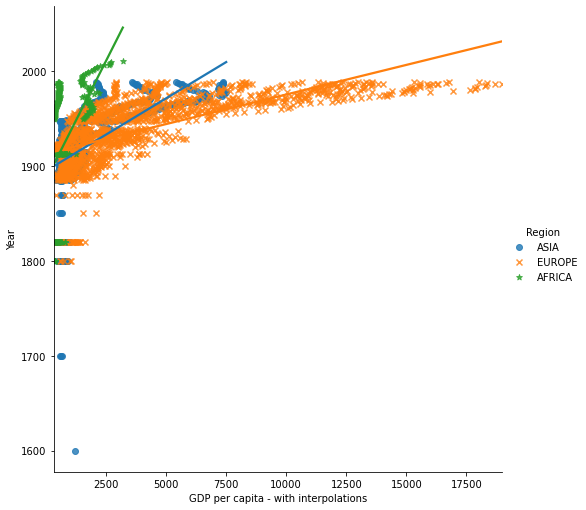

In [33]:
sns.lmplot(data=AAE,y='Year',x='GDP per capita - with interpolations',hue='Region',height=7,ci=0, markers=['o','x','*'])

##  <a id="fig2"><center>Figure 2</center></a>  

In [111]:
scatterplots = list()
for name in AFA["Area"].unique():
    df = AFA[AFA["Area"] == name]
    trace = go.Scatter(
        x=df["Year"],
        y=df["GDP per capita - with interpolations"],
        name=name,
        marker=dict(symbol="circle", sizemode="area", sizeref=10, size=df["GDP per capita - with interpolations"]), 
    )
    scatterplots.append(trace)

layout = go.Layout(
    title="GDP per capita in Africa",
    xaxis=dict(title="Year"),
    yaxis=dict(title="GDP per capita"),
    showlegend=True,
)

fig = dict(data=scatterplots, layout=layout)
py.iplot(fig)

##  <a id="fig3"><center>Figure 3</center></a>  

In [112]:
scatterplots = list()
for name in ASA["Area"].unique():
    df = ASA[ASA["Area"] == name]
    trace = go.Scatter(
        x=df["Year"],
        y=df["GDP per capita - with interpolations"],
        name=name,
        marker=dict(symbol="circle", sizemode="area", sizeref=10, size=df["GDP per capita - with interpolations"]), #size of each circle = df["ID"]
    )
    scatterplots.append(trace)

layout = go.Layout(
    title="GDP per capita in Asia ",
    xaxis=dict(title="Year"),
    yaxis=dict(title="GDP per capita"),
    showlegend=True,
)

fig = dict(data=scatterplots, layout=layout)
py.iplot(fig)

##  <a id="fig4"><center>Figure 4</center></a>  

In [113]:
scatterplots = list()
for name in EUR["Area"].unique():
    df = EUR[EUR["Area"] == name]
    trace = go.Scatter(
        x=df["Year"],
        y=df["GDP per capita - with interpolations"],
        name=name,
        marker=dict(symbol="circle", sizemode="area", sizeref=10, size=df["GDP per capita - with interpolations"]), #size of each circle = df["ID"]
    )
    scatterplots.append(trace)

layout = go.Layout(
    title="GDP per capita in Europe ",
    xaxis=dict(title="Year"),
    yaxis=dict(title="GDP per capita"),
    showlegend=True,
)

fig = dict(data=scatterplots, layout=layout)
py.iplot(fig)

As showen in <a href='#fig1'>figure 1</a> that GDP befor __1900s__ that Asia, Africa and Europe continents have a constant GPD and Europe leads the continents, after __1900s__ the three continents have a huge rates of growth in GPD as showen, Europe from 1900 to 2000 have a growth of GPD with more than __17,500__ GPD per capita , Africa from 1900 to 200 have a growth of GPD with more than __3000__ GPD per capita and Asia from 1900 to 200 have a growth of GPD with more than __7000__ GPD per capita.

In figure 2,3,4 for Africa, Asia and Europe countries have constant GPD befor __1900s__ and they have a substantial changes in GDP after 1900s for example in Africa's countries in <a href='#fig2'>figure 2</a> we can see that some countries have a big GPD growth as South Sudan for more than __3000__ GPD per capita, in Aisa's countries in <a href='#fig3'>figure 3</a> we can see that most of the countries have a big GPD growth as Kazakhstan for more than __6000__ GPD per capita and in Europe's countries in <a href='#fig4'>figure 4</a> we can see that most of the countries have a big GPD growth as Russia for more than __10k__ GPD per capita.

This changes that happend after 1900s because the business expansion meant increased wealth as raw materials became cheaper to obtain, driving prices down and consumption up. Among the most prosperous businesses of the era were the oil, steel, textile, railroad, and food production industries whish leads to that poor countries can afford to buy many goods like meals etc... 
